In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:

# Load the dataset from UCI ML Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
                'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points',
                'mean symmetry', 'mean fractal dimension', 'se radius', 'se texture', 'se perimeter',
                'se area', 'se smoothness', 'se compactness', 'se concavity', 'se concave points',
                'se symmetry', 'se fractal dimension', 'worst radius', 'worst texture', 'worst perimeter',
                'worst area', 'worst smoothness', 'worst compactness', 'worst concavity',
                'worst concave points', 'worst symmetry', 'worst fractal dimension']
data = pd.read_csv(url, header=None, names=column_names)

In [3]:
# Data Cleaning
data.drop('id', axis=1, inplace=True)  # Remove the ID column

# Data Engineering
diagnosis_map = {'M': 1, 'B': 0}
data['diagnosis'] = data['diagnosis'].map(diagnosis_map)

# Exploratory Data Analysis
print(data.head())  # Display first few records
print(data.describe())  # Summary statistics
print(data['diagnosis'].value_counts())  # Class distribution

   diagnosis  mean radius  mean texture  mean perimeter  mean area  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   mean smoothness  mean compactness  mean concavity  mean concave points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean symmetry  ...  worst radius  worst texture  worst perimeter  \
0         0.2419  ...         25.38          

In [4]:
# Data Preprocessing
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Model Training
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



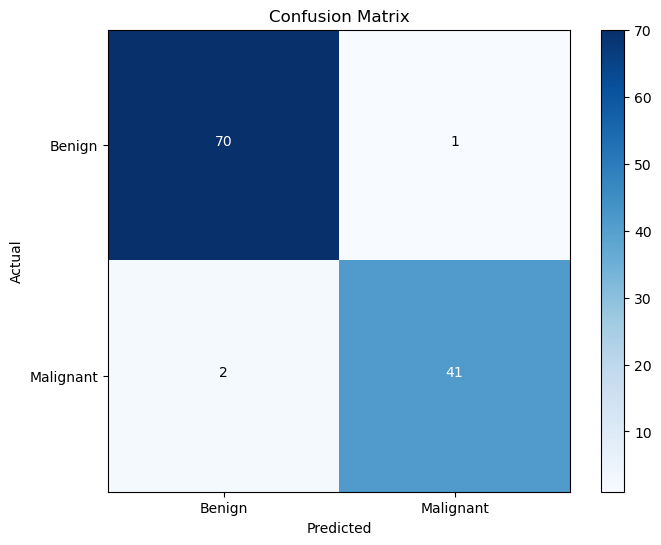

In [6]:
# Model Testing
y_pred = classifier.predict(X_test)

# Model Evaluation
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

# Plotting
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
plt.imshow(confusion_mat, cmap=plt.cm.Blues, interpolation='nearest')
labels = ['Benign', 'Malignant']
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
plt.colorbar()

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, confusion_mat[i, j],
                 horizontalalignment="center",
                 color="white" if confusion_mat[i, j] > confusion_mat.max() / 2 else "black")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()